<a href="https://www.kaggle.com/code/medisumeet/hr-analytics?scriptVersionId=288345362" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os

# List all files in the dataset folder
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
df1=pd.read_csv("//kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df=df1.copy()

In [5]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5


In [6]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column, df[column].unique())


Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


In [7]:
from sklearn.preprocessing import LabelEncoder


In [8]:
X=df["Attrition"]
df['Attrition']=LabelEncoder().fit_transform(X)

In [9]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df["EnvironmentSatisfaction"].unique()

array([2, 3, 4, 1])

In [11]:
df["EmployeeCount"].count()

1470

In [12]:
df["StandardHours"].unique()

array([80])

In [13]:
df["OverTime"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df.drop(["EmployeeCount","MaritalStatus","Over18","StandardHours"],axis=1,inplace=True)

In [15]:
df.drop("EmployeeNumber",axis=1,inplace=True)

In [16]:
df.drop(["HourlyRate", "DailyRate", "MonthlyRate"], axis=1, inplace=True)


In [17]:
monthly_income_attrition = df[df["Attrition"] == 1].groupby("MonthlyIncome")["Attrition"].count()


/tmp/ipykernel_13/2747000602.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition = df[df["Attrition"]==1].groupby("IncomeRange")["Attrition"].value_counts()


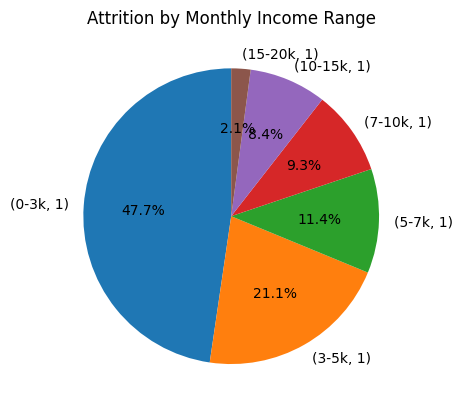

In [18]:
# Create income bins
bins = [0, 3000, 5000, 7000, 10000, 15000, 20000]
labels = ["0-3k","3-5k","5-7k","7-10k","10-15k","15-20k"]
df["IncomeRange"] = pd.cut(df["MonthlyIncome"], bins=bins, labels=labels)

# Count attritions in each bin
income_attrition = df[df["Attrition"]==1].groupby("IncomeRange")["Attrition"].value_counts()

# Plot pie chart
income_attrition.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.title("Attrition by Monthly Income Range")
plt.show()


**Employees Salary ranging from 0-5k have higher attrition rate**

In [19]:
df["Education"].unique()

array([2, 1, 4, 3, 5])

In [20]:
# Check attrition by education level
df.drop("Department",axis=1,inplace=True)

In [21]:
# Attrition rate by Department

# Attrition rate by JobRole
df.groupby('JobRole')['Attrition'].value_counts()


JobRole                    Attrition
Healthcare Representative  0            122
                           1              9
Human Resources            0             40
                           1             12
Laboratory Technician      0            197
                           1             62
Manager                    0             97
                           1              5
Manufacturing Director     0            135
                           1             10
Research Director          0             78
                           1              2
Research Scientist         0            245
                           1             47
Sales Executive            0            269
                           1             57
Sales Representative       0             50
                           1             33
Name: count, dtype: int64

In [22]:
# Attrition rate by RelationshipSatisfaction
df.groupby('RelationshipSatisfaction')['Attrition'].mean()


RelationshipSatisfaction
1    0.206522
2    0.148515
3    0.154684
4    0.148148
Name: Attrition, dtype: float64

In [23]:
df.drop("RelationshipSatisfaction",axis=1,inplace=True)

In [24]:
df.groupby(['Attrition', 'OverTime'])['JobSatisfaction'].count()


Attrition  OverTime
0          No          944
           Yes         289
1          No          110
           Yes         127
Name: JobSatisfaction, dtype: int64

In [25]:
df.groupby("Attrition")["BusinessTravel"].value_counts()

Attrition  BusinessTravel   
0          Travel_Rarely        887
           Travel_Frequently    208
           Non-Travel           138
1          Travel_Rarely        156
           Travel_Frequently     69
           Non-Travel            12
Name: count, dtype: int64

In [26]:
df.groupby("Attrition")["Gender"].value_counts()

Attrition  Gender
0          Male      732
           Female    501
1          Male      150
           Female     87
Name: count, dtype: int64

In [27]:
df.groupby("JobLevel")["Attrition"].value_counts()

JobLevel  Attrition
1         0            400
          1            143
2         0            482
          1             52
3         0            186
          1             32
4         0            101
          1              5
5         0             64
          1              5
Name: count, dtype: int64

In [28]:
df.groupby(['JobLevel', 'Attrition'])['JobSatisfaction'].value_counts()


JobLevel  Attrition  JobSatisfaction
1         0          4                  137
                     3                  119
                     2                   79
                     1                   65
          1          3                   43
                     1                   41
                     4                   30
                     2                   29
2         0          4                  163
                     3                  142
                     1                   89
                     2                   88
          1          3                   21
                     1                   13
                     2                    9
                     4                    9
3         0          3                   58
                     4                   56
                     1                   40
                     2                   32
          1          4                   11
                     1                 

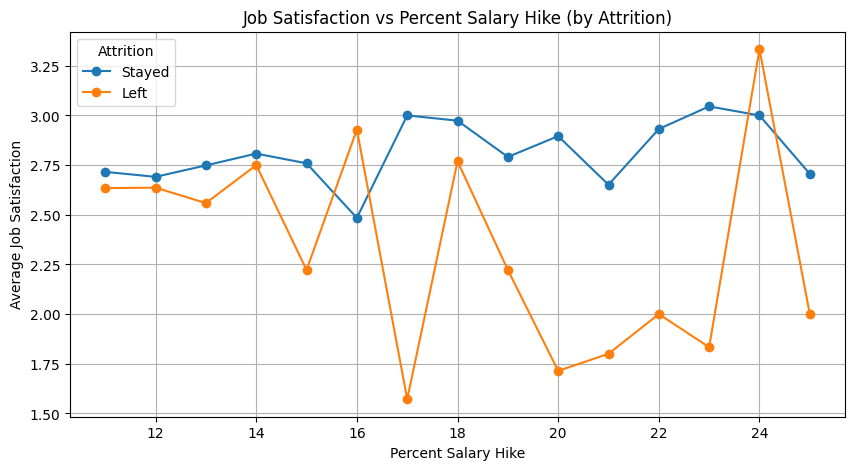

In [29]:
satis_salary = df.groupby(['PercentSalaryHike', 'Attrition'])['JobSatisfaction'].mean().unstack()

plt.figure(figsize=(10,5))
for attrition_status in satis_salary.columns:
    label = 'Stayed' if attrition_status == 0 else 'Left'
    plt.plot(satis_salary.index, satis_salary[attrition_status], marker='o', label=label)

plt.xlabel('Percent Salary Hike')
plt.ylabel('Average Job Satisfaction')
plt.title('Job Satisfaction vs Percent Salary Hike (by Attrition)')
plt.grid(True)
plt.legend(title='Attrition')
plt.show()

In [30]:
df.groupby("WorkLifeBalance")["Attrition"].value_counts()


WorkLifeBalance  Attrition
1                0             55
                 1             25
2                0            286
                 1             58
3                0            766
                 1            127
4                0            126
                 1             27
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1470 non-null   int64   
 1   Attrition                1470 non-null   int64   
 2   BusinessTravel           1470 non-null   object  
 3   DistanceFromHome         1470 non-null   int64   
 4   Education                1470 non-null   int64   
 5   EducationField           1470 non-null   object  
 6   EnvironmentSatisfaction  1470 non-null   int64   
 7   Gender                   1470 non-null   object  
 8   JobInvolvement           1470 non-null   int64   
 9   JobLevel                 1470 non-null   int64   
 10  JobRole                  1470 non-null   object  
 11  JobSatisfaction          1470 non-null   int64   
 12  MonthlyIncome            1470 non-null   int64   
 13  NumCompaniesWorked       1470 non-null   int64   
 14  OverTime

In [32]:
df.groupby(["OverTime",  "PerformanceRating"])["Attrition"].value_counts()


OverTime  PerformanceRating  Attrition
No        3                  0            797
                             1             96
          4                  0            147
                             1             14
Yes       3                  0            247
                             1            104
          4                  0             42
                             1             23
Name: count, dtype: int64

In [33]:
df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [34]:
df.groupby('Education')['Attrition'].mean()


Education
1    0.182353
2    0.156028
3    0.173077
4    0.145729
5    0.104167
Name: Attrition, dtype: float64

In [35]:
bins = [0, 5, 10, 15, 20, 30]  # include 30 to cover max 29
labels = ['1-5 km', '6-10 km', '11-15 km', '16-20 km', '21-29 km']

df['DistanceBin'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, include_lowest=True)


In [36]:
df.groupby("DistanceBin")["Attrition"].value_counts()


/tmp/ipykernel_13/1499963314.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("DistanceBin")["Attrition"].value_counts()


DistanceBin  Attrition
1-5 km       0            545
             1             87
6-10 km      0            337
             1             57
11-15 km     0             90
             1             25
16-20 km     0            102
             1             23
21-29 km     0            159
             1             45
Name: count, dtype: int64

/tmp/ipykernel_13/434796814.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_rate = df.groupby('DistanceBin')['Attrition'].mean()  # mean gives rate of 1s


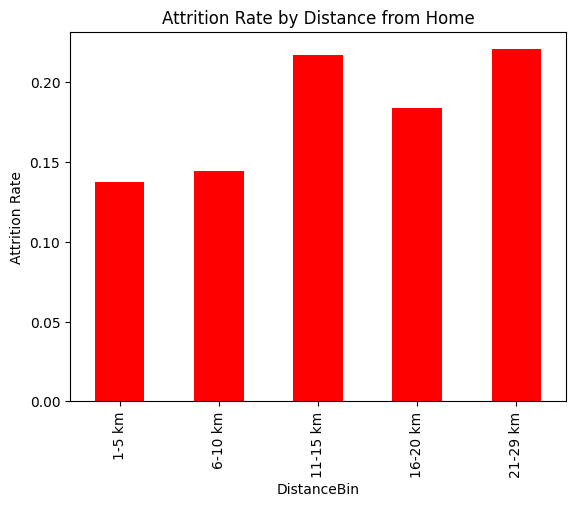

In [37]:
# Compute attrition rate per bin
attrition_rate = df.groupby('DistanceBin')['Attrition'].mean()  # mean gives rate of 1s

# Plot
attrition_rate.plot(kind='bar', color='red', title='Attrition Rate by Distance from Home')
plt.ylabel('Attrition Rate')
plt.show()


In [38]:
df.groupby(["IncomeRange","DistanceBin"])["Attrition"].value_counts()

/tmp/ipykernel_13/3997421992.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["IncomeRange","DistanceBin"])["Attrition"].value_counts()


IncomeRange  DistanceBin  Attrition
0-3k         1-5 km       0            126
                          1             43
             6-10 km      0             81
                          1             31
             11-15 km     0             22
                          1              7
             16-20 km     0             22
                          1             14
             21-29 km     0             31
                          1             18
3-5k         1-5 km       0            130
                          1             20
             6-10 km      0             82
                          1             11
             11-15 km     0             24
                          1              7
             16-20 km     0             25
                          1              4
             21-29 km     0             43
                          1              8
5-7k         1-5 km       0            112
                          1              8
             6-10 